# Dimenziona redukcija

Prema Hafovom fenomenu, ako je broj uzoraka za treniranje fiksan, a broj dimenzija nastavimo da povećavamo, prediktivna moć našeg modela mašinskog učenja u početku raste, ali nakon određene tačke ima tendenciju da opada.

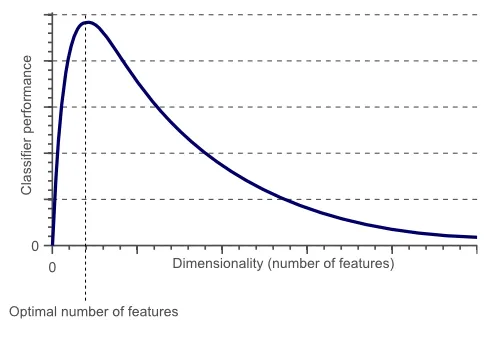

Ako nastavimo da povećavamo broj dimenzija, svaka dimenzija može imati određeni opseg mogućih vrednosti. Kako dimenzije rastu, potrebno je povećavati broj uzoraka kako bismo osigurali da postoji dovoljno uzoraka sa svim kombinacijama vrednosti. Tipično, broj uzoraka potrebnih za dobru predikciju raste eksponencijalno s povećanjem dimenzija. U stvarnom svetu, skupovi podataka često imaju hiljade karakteristika, što znači da količina podataka potrebnih da se isprati rast dimenzija postaje ogromna, što drastično povećava vreme obuke. S druge strane, ako nastavimo da povećavamo dimenzije, a ne povećavamo broj uzoraka, naši algoritmi za mašinsko učenje imaju tendenciju da daju overfitovan model, što smanjuje njegovu performansu.

## PCA (Principal Component Analysis) ##

PCA je tehnika linearne redukcije dimenzionalnosti koja konvertuje skup korelisanih dimenzija iz visokodimenzionalnog prostora u niz nekorelisanih dimenzija u niskodimenzionalnom prostoru. Te nekorelisane dimenzije nazivaju se glavne komponente (principal components).

PCA predstavlja ortogonalnu linearnu transformaciju, što znači da su sve glavne komponente međusobno normalne (tj. pod pravim uglom). Transformiše podatke tako da prva komponenta pokušava da objasni maksimalnu varijansu iz originalnih podataka.

Ukoliko je potrebno redukovati broj dimenzija na 1, koja dimenzija bi bila eliminisana, F1 ili F2?

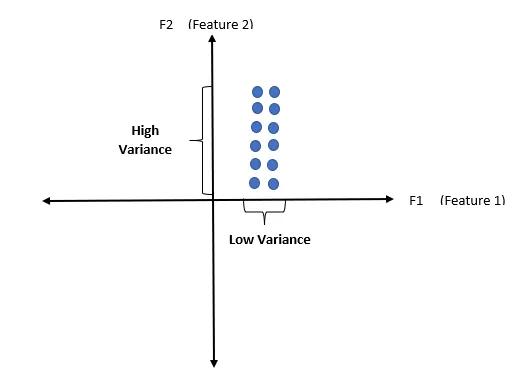

Koja dimenzija nosi više informacija? Da li su jednako informativne?

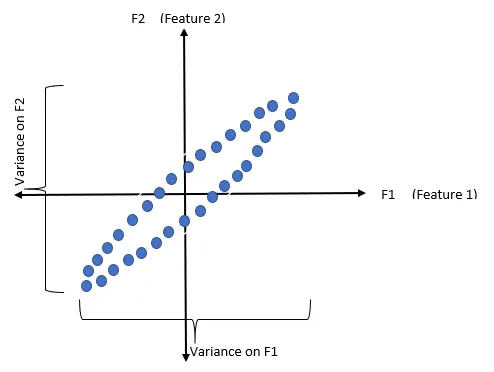

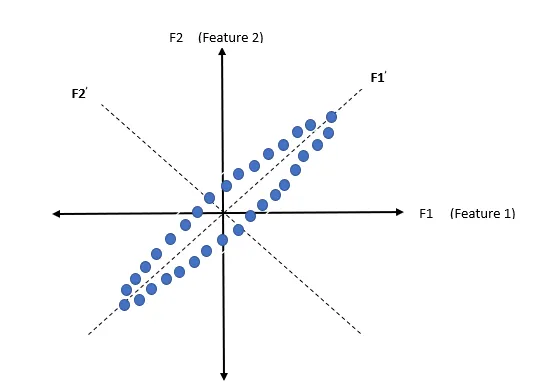

Šta ortogonalna linearna transformacija znači?

Da bi pronašla nove dimenzije, sve što PCA radi jeste da rotira originalne ose na taj način da obuhvati što veću varijansu na novim osama nakon što na njih projektuje podatke. Nove ose predstavljaju linearnu kombinaciju originalnih osa..

Primer 1: V1 i V2 su 2 glavne komponente, koje su moguće sopstvene vrednosti za ova dva sopstvena vektora?

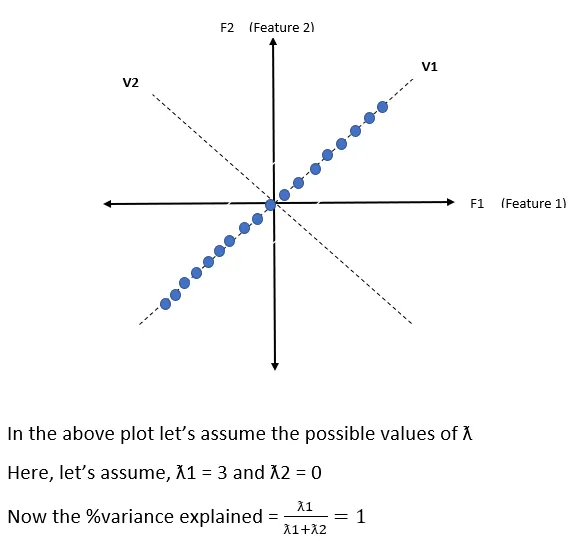

Primer 2: Koliki je gubitak informacija, redukovanjem dimenzija na jednu.

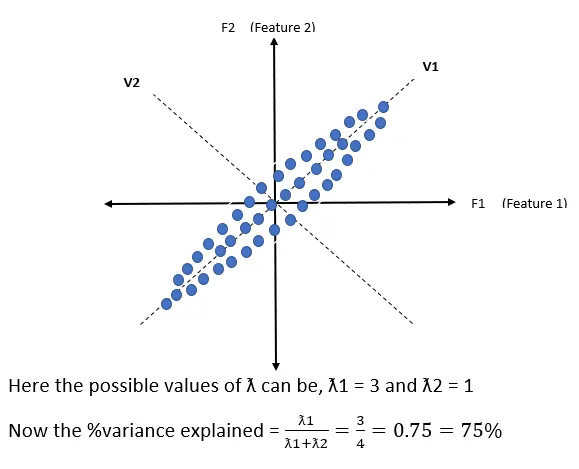

Primer 3: Da li je prihvatljivo redukovati broj dimenzija u ovom slučaju?

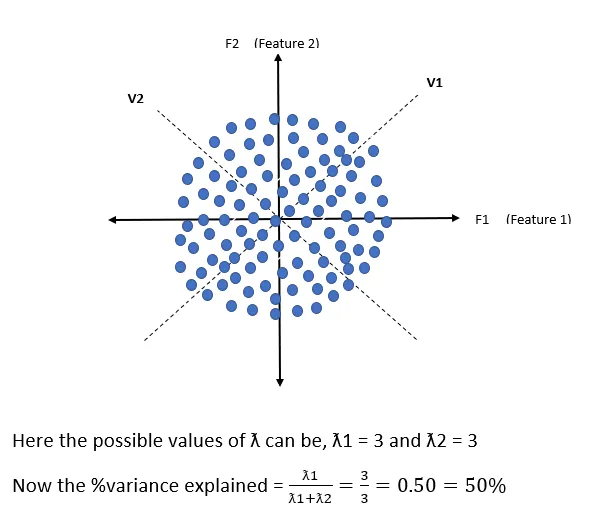

## tSNE (T-distributed Stochastic Neighbor Embedding)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

In [ ]:
# Selecting 10000 random points
np.random.seed(42)
indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

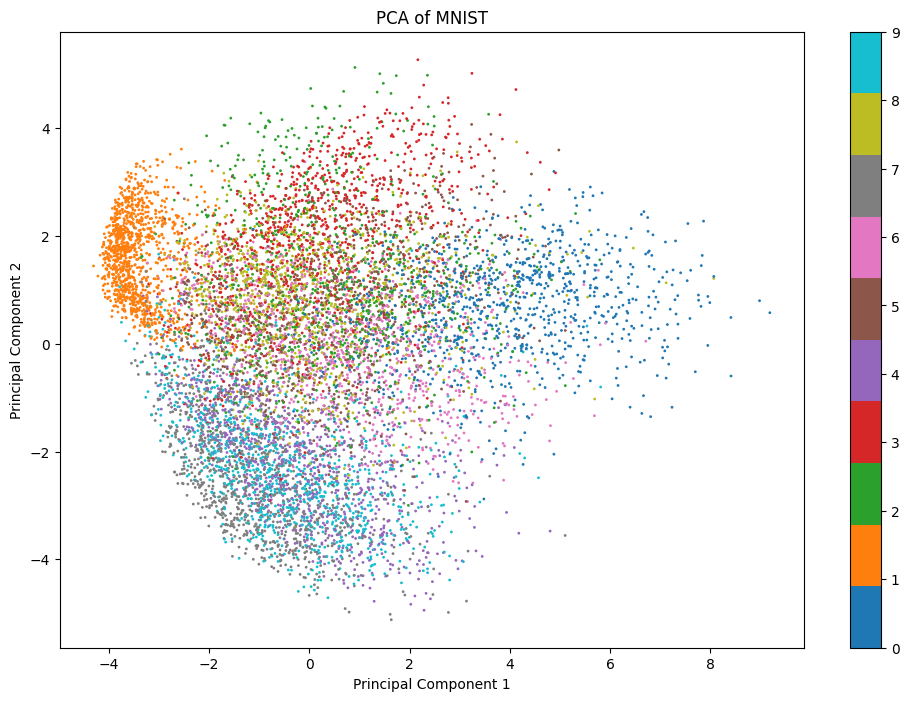

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


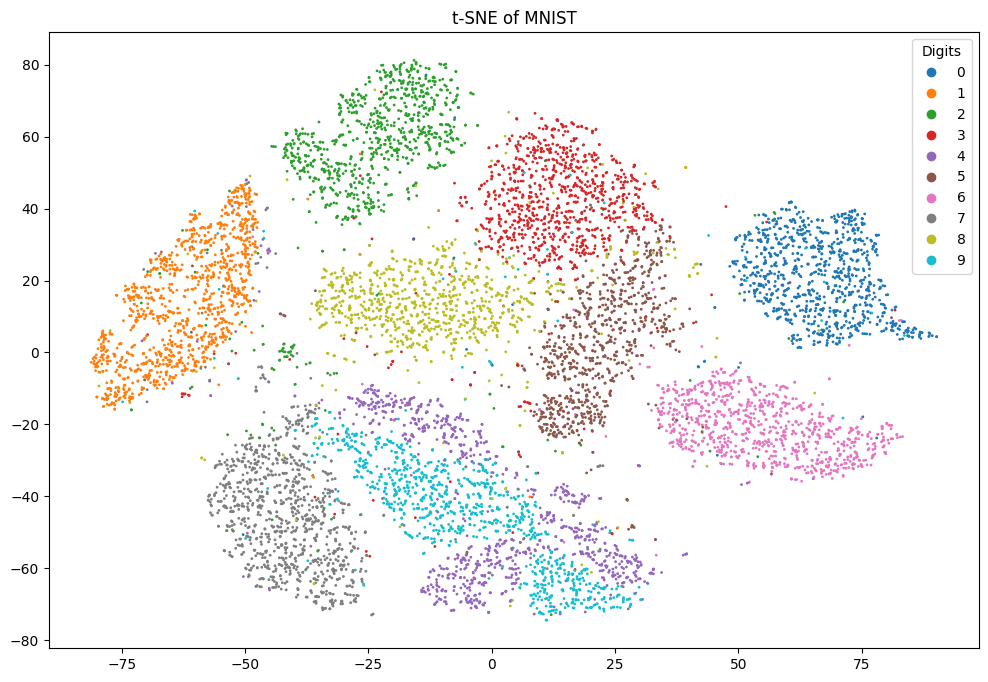

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of MNIST')
plt.show()

Vizualizacija kako tSNE rasporedjuje podatke u nisko dimenzionom prostoru
https://www.youtube.com/watch?v=SKb6rcmJfpM&t=17s



> t-SNE can reveal clusters and local structures very effectively. However, the distance between clusters or the relative position of clusters in the plot may not have a meaningful interpretation.





> t-SNE can mitigate but not completely overcome the curse of dimensionality. Very high-dimensional data might require other steps, like initial dimensionality reduction with PCA, before applying t-SNE.



- https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

- https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

- https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea


## Linear Discriminant Analysis (LDA)

Linearna diskriminantna analiza (LDA) služi kao tehnika za redukciju dimenzionalnosti i klasifikaciju, s ciljem optimizacije razdvajanja različitih klasa unutar skupa podataka. LDA je posebno česta u scenarijima nadgledanog učenja, gde su klase podataka unapred definisane. Dok je PCA "nenadgledani" algoritam koji zanemaruje oznake klasa i fokusira se na pronalaženje glavnih komponenti radi maksimizacije varijanse skupa podataka, LDA koristi "nadgledani" pristup. LDA izračunava "linearne diskriminante", određujući pravce koji služe kao ose za maksimizaciju razdvajanja između više klasa.

Koraci Linearne diskriminantne analize (LDA):

1. Izračunavanje srednjih vrednosti za svaku klasu. Na primer za iris skup:

    Mean Vector class 1: [ 5.006  3.418  1.464  0.244]

    Mean Vector class 2: [ 5.936  2.77   4.26   1.326]

    Mean Vector class 3: [ 6.588  2.974  5.552  2.026]

2. Izračunavanje matrica raspršenosti (Scatter Matrices)

    -> Unutar-klasna raspršenost i Između-klasna raspršenost:

3. Formiranje matrice za optimizaciju koja maksimizuje razdvajanje izmedju klasa

4. Izračunavanje sopstvenih vrednosti i sopstvenih vektora te matrice

5. Odabir k sopstvenih vektora sa najvećim odgovarajućim sopstvenim vektorima

    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

In [ ]:
explained_variance_ratio = lda.explained_variance_ratio_

In [ ]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [ ]:
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1

In [ ]:
X_train_lda_selected = lda.transform(X_train)[:, :n_components]
X_test_lda_selected = lda.transform(X_test)[:, :n_components]

 - https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c